# Logistic Regression 

logistic regression is named for the function used at the core of the method, the logistic function(sigmoid function).
https://en.wikipedia.org/wiki/Logistic_function

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

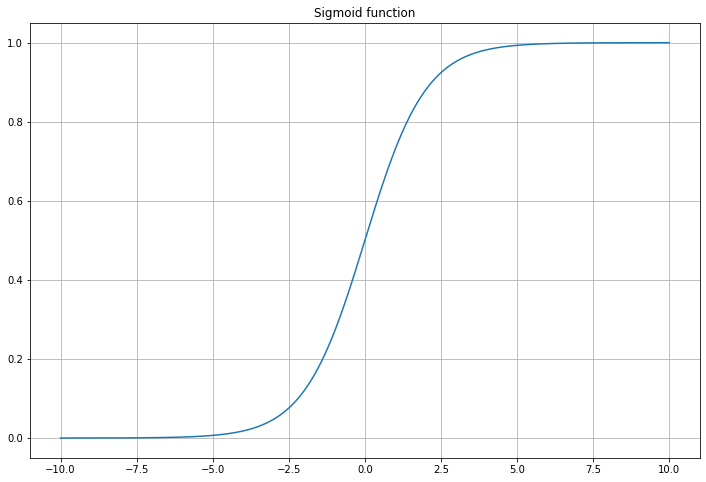

In [3]:
x= np.linspace (-10,10, num=1000)
plt.figure(figsize=(12,8))
plt.plot(x,1/(1+np.exp(-x)))#Sigmoid function
plt.title('Sigmoid function')
plt.grid()

You need a cut-off point as the bench mark.

In [1]:
tmp= [0,0.4,0.6,0.8,1]

In [13]:
tmp

[0, 0.4, 0.6, 0.8, 1]

In [14]:
np.round(tmp)

array([0., 0., 1., 1., 1.])

In [15]:
np.array(tmp)>0.7 

array([False, False, False,  True,  True])

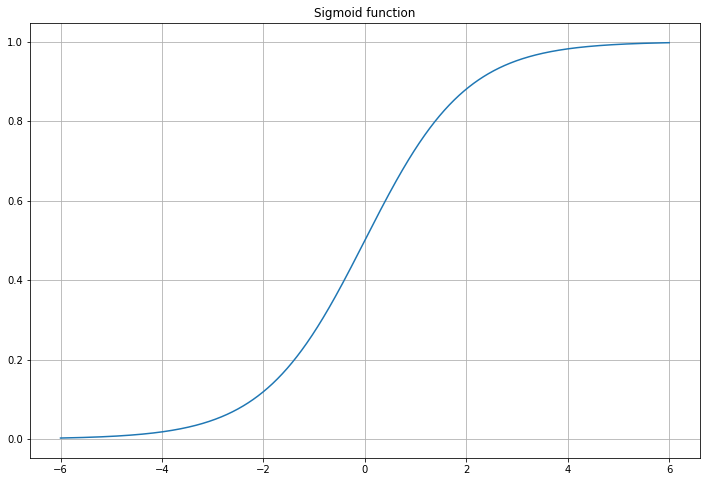

In [4]:
x= np.linspace (-6,6, num=1000)
plt.figure(figsize=(12,8))
plt.plot(x,1/(1+np.exp(-x)))#Sigmoid function
plt.title('Sigmoid function')
plt.grid()

Definition of the logistic function
https://en.wikipedia.org/wiki/Logistic_regression

Its representation is like the probabilities between zero  and one, 
We can make it zero and one in near future.

Lets generate train dataset.

In [2]:
dataset=[[-2.0011,0],
         [-1.4654,0],
         [0.0965, 0],
         [1.3881, 0],
         [3.0641, 0],
         [7.6275, 1],
         [5.3324, 1],
         [6.9225, 1],
         [8.6754, 1],
         [7.6737, 1]]
dataset

[[-2.0011, 0],
 [-1.4654, 0],
 [0.0965, 0],
 [1.3881, 0],
 [3.0641, 0],
 [7.6275, 1],
 [5.3324, 1],
 [6.9225, 1],
 [8.6754, 1],
 [7.6737, 1]]

Lets say you have beengiven the coeficcients. B1,B2

In [4]:
coef = [-0.806605464, 0.2573316]

In [7]:
for row in dataset:
    yhat = 1.0/(1.0+np.exp(-coef[0]-coef[1]*row[0]))
    print('yhat {0:.4f}, yhat{1}'.format(yhat,round(yhat)))

yhat 0.2106, yhat0.0
yhat 0.2344, yhat0.0
yhat 0.3139, yhat0.0
yhat 0.3895, yhat0.0
yhat 0.4955, yhat0.0
yhat 0.7606, yhat1.0
yhat 0.6377, yhat1.0
yhat 0.7261, yhat1.0
yhat 0.8063, yhat1.0
yhat 0.7628, yhat1.0


Its how Logistic regression decides. But in real world we have to estimate B1 and B2.

You can either apply Gradient descent algorithm to find them or...

# Using Scikit learn to estimate Coefficients

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
X= np.array(dataset)[:,0:1]
y=np.array(dataset)[:,1]

In [11]:
X

array([[-2.0011],
       [-1.4654],
       [ 0.0965],
       [ 1.3881],
       [ 3.0641],
       [ 7.6275],
       [ 5.3324],
       [ 6.9225],
       [ 8.6754],
       [ 7.6737]])

In [12]:
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [24]:
Clf_LR= LogisticRegression(C=1.0, penalty='l1', tol=0.1)

In [25]:
Clf_LR.fit(X,y)

C:\Users\amin1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.1, verbose=0,
                   warm_start=False)

In [26]:
ypred=Clf_LR.predict(X)
ypred

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

Its wrong 5 zeros!

change the tolerence or maybe l1 to l2

In [35]:
Clf_LR.predict_proba(X)

array([[0.89463865, 0.10536135],
       [0.86683492, 0.13316508],
       [0.74995793, 0.25004207],
       [0.6124482 , 0.3875518 ],
       [0.40760812, 0.59239188],
       [0.06674486, 0.93325514],
       [0.18254727, 0.81745273],
       [0.0921179 , 0.9078821 ],
       [0.04079   , 0.95921   ],
       [0.06533126, 0.93466874]])

The fifth one 's prediction is just greater than 0.5

To compare the prediction and the true value we will use stack

In [45]:
np.column_stack((ypred,y))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [59]:
dataset2 = [[0.2, 0.],
            [0.2, 0.],
            [0.2, 0.],
            [0.2, 0.],
            [0.2, 0.],
           [0.4, 0.],
           [0.3, 0.],
           [0.2, 0.],
           [0.2, 0.],
           [0.1, 0.],
           [1.4, 1.],
           [1.5, 1.],
           [1.5, 1.],
           [1.3, 1.],
           [1.6, 1.],
            [1., 1.],
           [1.3, 1.],
           [1.4, 1.]]

In [60]:
X= np.array(dataset2)[:,0:1]
y=np.array(dataset2)[:,1]

In [61]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4]])

In [62]:
Clf_LR= LogisticRegression(C=1.0, penalty='l1', tol=0.01)

In [63]:
Clf_LR.fit(X,y)

/home/amin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.01, verbose=0,
                   warm_start=False)

In [64]:
ypred=Clf_LR.predict(X)
ypred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [65]:
np.column_stack((ypred,y))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

Perfect Prediction